In [2]:
import numpy as np
import pylab as plt
from collections import Counter
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from pyabc.examples import tuberculosis
import pyabc.prior
from pyabc.plots import plot_marginals, plot_particles
%matplotlib notebook

## Intractable model by Tanaka et al. 2006 for spread of tuberculosis

![](img/transmission_process.png)

### model parameter
$\alpha$: rate with which each infectious host randomly infects other individuals from an unlimited supply of hosts

$\delta$: rate with which a host stops being infectious, either by recovering or dying

$\tau$: rate with which the pathogen of the host mutates randomly within the host, generating a novel haplotype under a single-locus infinite alleles model

$\theta = (\alpha, \delta, \tau)$

$y_{\theta} = (6,3,2,2,1,1,1,1,1,1,1)$: output, vector of clusters, that is different haplotypes. Each number represents the infectious hosts for this particular haplotype

### Observation
$\alpha = 0.2, \delta = 0, \tau = 0.198, m = 20$

assume, that $\delta, \tau$ are known and apply uniform prior

In [3]:
alpha = 0.2
delta = 0.1
tau = 0.198
m = 20
N = 2e7

prior_alpha = pyabc.Prior("uniform", 0.1, 1, name="alpha")
prior_tau = pyabc.Prior("uniform", 0.01, 1, name="tau")

simulator = tuberculosis.simulator

In [4]:
min(prior_alpha.sample(10000))

array([ 0.10011681])

In [5]:
# for i in range(100):
#     params = [prior_alpha.sample(),prior_delta.sample(),prior_tau.sample()]
#     y0 = simulator(*params)

params = [alpha, tau]

y0 = simulator(*params)
y0

array([7, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [6]:
list_of_sum = tuberculosis.summaries
for f in list_of_sum:
    print(f.__name__)
    print(f(y0))
    
#summaries = tuberculosis.summaries
summaries = [lambda x: x]

nr_mutations
20
max_cluster
7
nr_transmissions
2


In [7]:
# in this cell, I tested why the 'identity' summary statistic makes problems

from pyabc.utils import flatten_function
from pyabc.prior import PriorList

p = PriorList([prior_alpha])
thetas = p.sample(2)

sim_a = lambda alpha: simulator(alpha, 0.2, 0.1)

simulate_and_summarize = lambda thetas: flatten_function(summaries, sim_a(*thetas))
np.apply_along_axis(simulate_and_summarize, axis=1, arr=thetas)
#simulate_and_summarize(params).shape

array([[ 10.,   3.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  3.,   2.,   2.,   2.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]])

### ABC with summary stats

In [7]:
rej = pyabc.RejectionSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337, verbosity=1)

smc = pyabc.SMCSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)


mcmc = pyabc.MCMCSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=summaries,
                             observation=y0, seed = 1337)

In [8]:
rej.sample(nr_samples=1000, threshold=2)

Rejection sampler started with threshold: 2 and number of samples: 1000
Samples:   1000 - Threshold: 2.0000 - Iterations:      29000 - Acceptance rate: 0.034483 - Time:    15.08 s


In [9]:
smc.sample(nr_samples=1000, thresholds=np.linspace(5, 2, 5))

SMC sampler started with thresholds: [ 5.    4.25  3.5   2.75  2.  ] and number of samples: 1000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
starting iteration[ 3 ]
Iteration 3 completed
starting iteration[ 4 ]
Iteration 4 completed
Samples:   1000 - Thresholds: 2.00 - Iterations:      29693 - Acceptance rate: 0.033678 - Time:    32.54 s


In [10]:
mcmc.sample(nr_samples=1000, threshold=2, step_size = [0.1, 0.1])

MCMC sampler started with threshold: 2 and number of samples: 1000
Samples:   1000 - Threshold: 2.0000 - Iterations:      16282 - Acceptance rate: 0.061418 - Time:    14.50 s


<IPython.core.display.Javascript object>


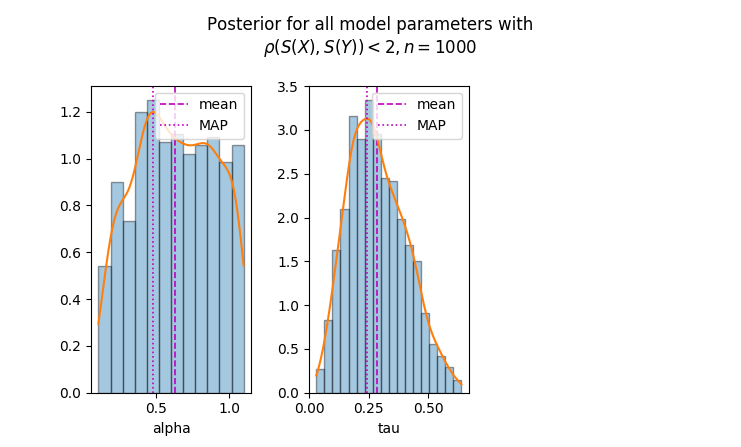

<IPython.core.display.Javascript object>


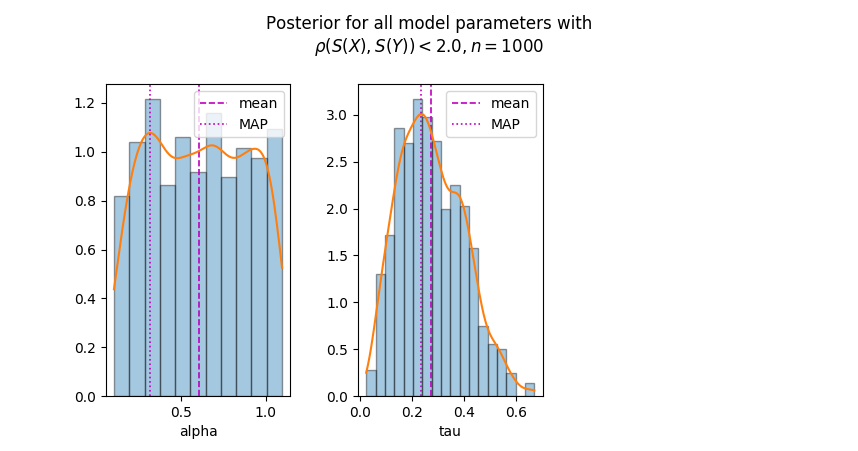

<IPython.core.display.Javascript object>


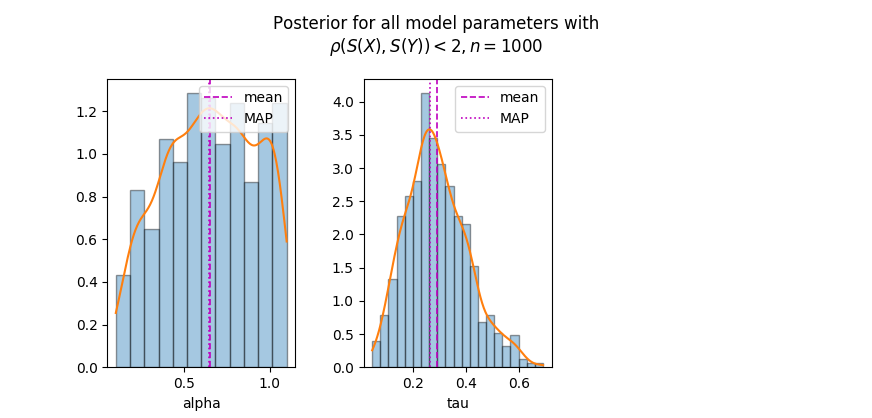

In [11]:
plot_marginals(rej, kde=True, normed=True)
plot_marginals(smc, kde=True, normed=True)
plot_marginals(mcmc, kde=True, normed=True)

<IPython.core.display.Javascript object>


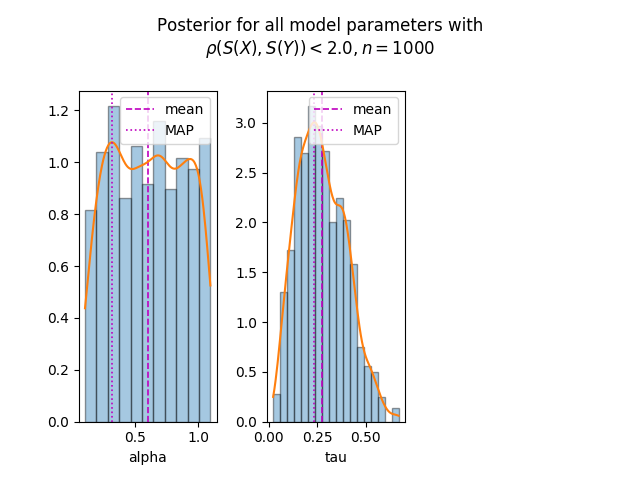

<IPython.core.display.Javascript object>


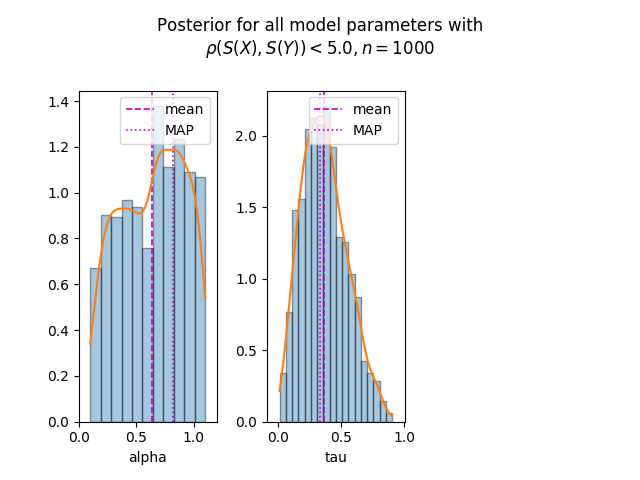

<IPython.core.display.Javascript object>


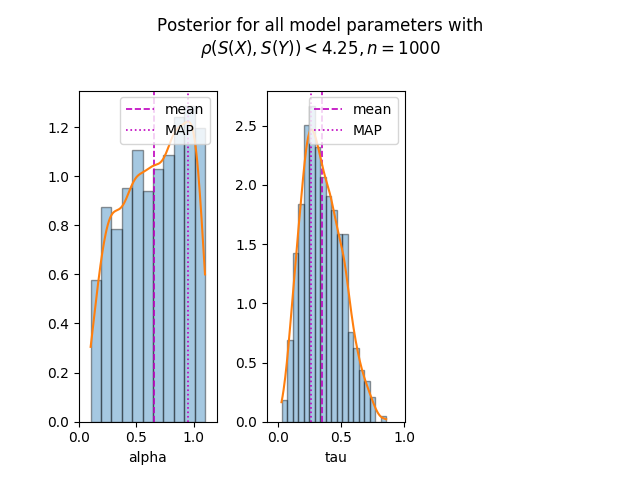

<IPython.core.display.Javascript object>


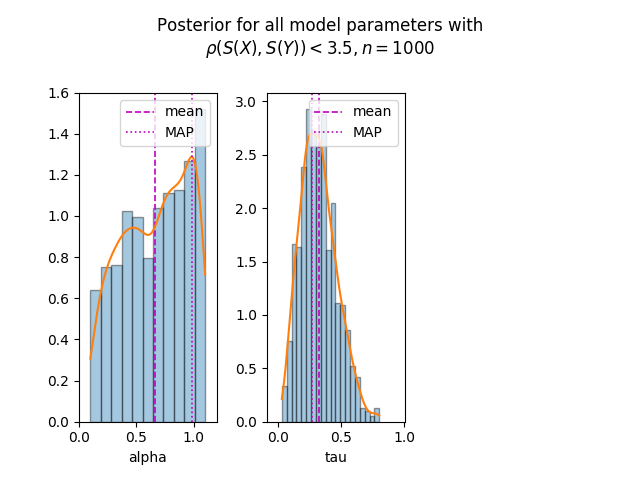

<IPython.core.display.Javascript object>


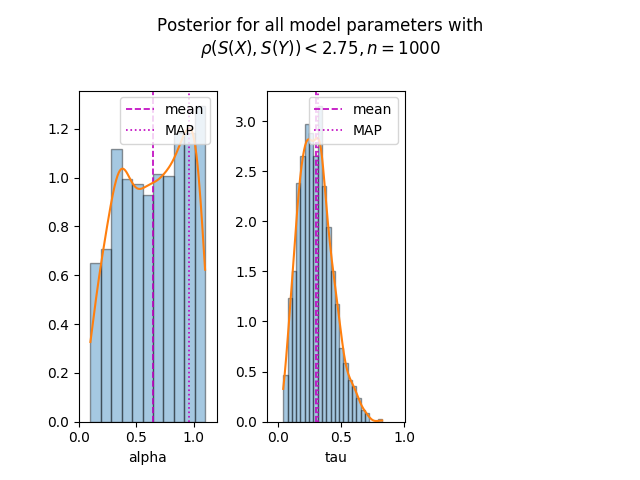

<IPython.core.display.Javascript object>


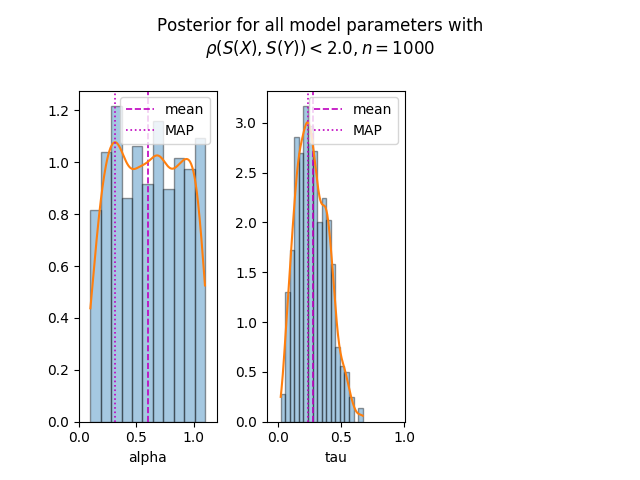

In [14]:
plot_marginals(smc, plot_all=True)

<IPython.core.display.Javascript object>


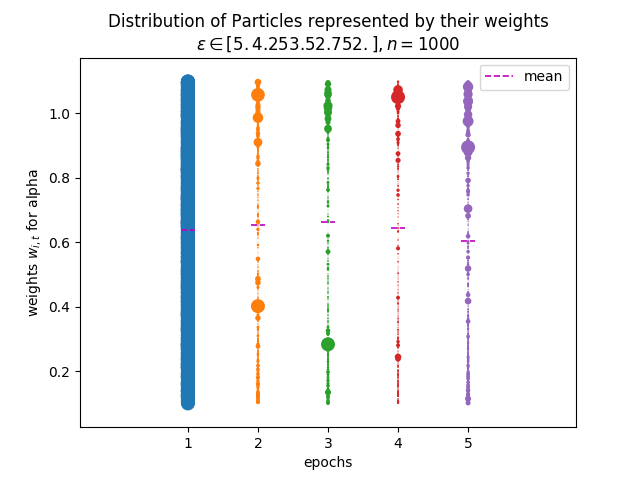

<IPython.core.display.Javascript object>


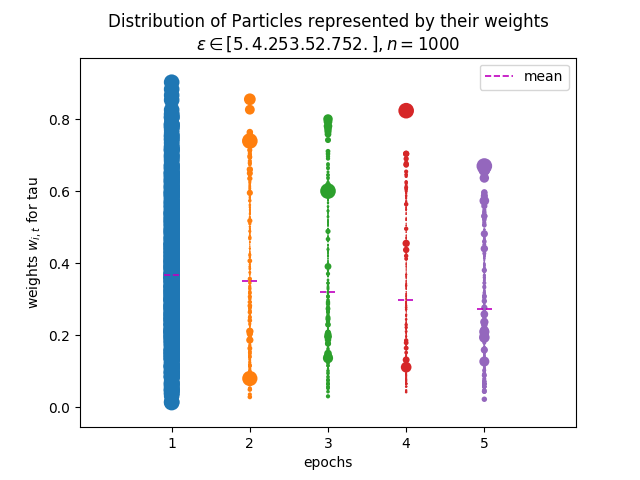

In [12]:
plot_particles(smc)

### ABC with identity

In [15]:
idendity = lambda x: x

rej = pyabc.RejectionSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=idendity,
                             observation=y0, seed = 1337, verbosity=1)

smc = pyabc.SMCSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=idendity,
                             observation=y0, seed = 1337)


mcmc = pyabc.MCMCSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=idendity,
                             observation=y0, seed = 1337)

In [16]:
rej.sample(nr_samples=1000, threshold=2)

Rejection sampler started with threshold: 2 and number of samples: 1000
Samples:   1000 - Threshold: 2.0000 - Iterations:      29000 - Acceptance rate: 0.034483 - Time:    14.49 s


In [17]:
smc.sample(nr_samples=1000, thresholds=np.linspace(5, 2, 5))

SMC sampler started with thresholds: [ 5.    4.25  3.5   2.75  2.  ] and number of samples: 1000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
starting iteration[ 3 ]
Iteration 3 completed
starting iteration[ 4 ]
Iteration 4 completed
Samples:   1000 - Thresholds: 2.00 - Iterations:      29693 - Acceptance rate: 0.033678 - Time:    31.08 s


In [18]:
mcmc.sample(nr_samples=1000, threshold=2, step_size = [0.1, 0.1])

MCMC sampler started with threshold: 2 and number of samples: 1000
Samples:   1000 - Threshold: 2.0000 - Iterations:      16282 - Acceptance rate: 0.061418 - Time:    13.81 s


<IPython.core.display.Javascript object>


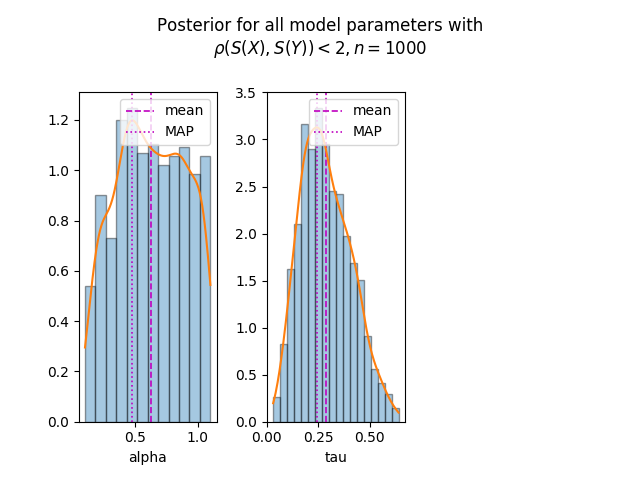

<IPython.core.display.Javascript object>


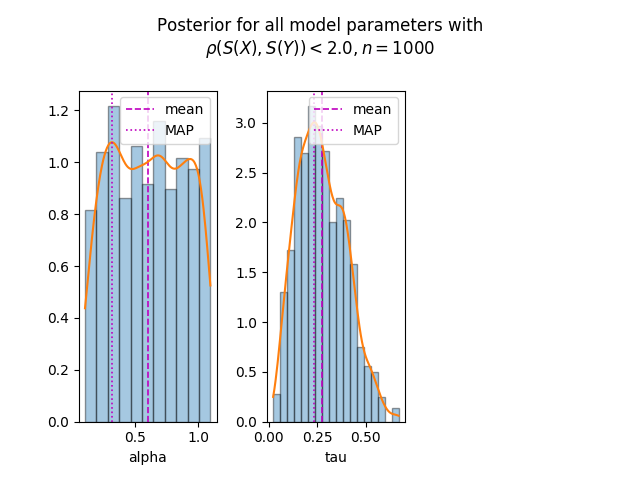

<IPython.core.display.Javascript object>


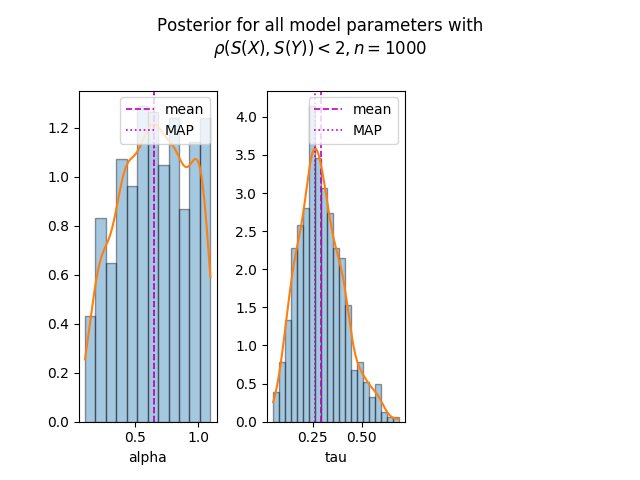

In [19]:
plot_marginals(rej, kde=True, normed=True)
plot_marginals(smc, kde=True, normed=True)
plot_marginals(mcmc, kde=True, normed=True)

### ABC with classifier LDA

In [14]:
def simulator(alpha, tau, delta=0, batch=10):
    m = 20
    return_val = np.zeros((batch, m))
    
    for run in range(batch):
        infected_hosts = np.array([[1]]) # list of haplotypes holding infectious hosts, we always start with one infected patient
        limit_exceeded = False
        round = 0

        while np.sum(infected_hosts) <= m and not limit_exceeded:
            round += 1

            #reset if all died
            if np.sum(infected_hosts) == 0:
                infected_hosts = np.array([[1]])

            # for each haplotype
            for cell in infected_hosts:
                # for each infectious host
                if cell[0] == 0:
                    continue
                for host in range(cell[0]):
                    # one of three things happen: transmission, mutation or recovery/death
                    event = np.random.rand()
                    # if he dies -> no more action possible
                    if event < delta:
                        cell -= 1

                        continue

                    # otherwise, he can infect others or/and mutate
                    event = np.random.rand()
                    if event < alpha:
                        if np.sum(infected_hosts) == m:
                            limit_exceeded = True
                            break
                        else:
                            cell += 1


                    event = np.random.rand()
                    if event < tau and cell[0] > 1:
                        new_cell = [1]
                        cell -= 1
                        infected_hosts = np.vstack((infected_hosts, new_cell))



                if limit_exceeded:
                    break

        for i in range(len(infected_hosts), m):
            infected_hosts = np.vstack((infected_hosts, [0]))
        
        return_val[run] = np.array(sorted(infected_hosts, reverse=True))[:m].flatten()

    return np.atleast_3d(return_val)

In [15]:
simulator(alpha, tau)

array([[[ 6.],
        [ 2.],
        [ 2.],
        [ 2.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 6.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 2.],
        [ 2.],
        [ 2.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]],

       [[ 3.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
    

In [16]:
idendity = lambda x: x

rej = pyabc.RejectionSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=idendity, distance='lda',
                             observation=y0, seed = 1337, verbosity=2)

smc = pyabc.SMCSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=idendity, distance='lda',
                             observation=y0, seed = 1337)


mcmc = pyabc.MCMCSampler(priors=[prior_alpha, prior_tau], simulator=simulator, 
                             summaries=idendity, distance='lda',
                             observation=y0, seed = 1337)

In [17]:
rej.sample(nr_samples=1000, threshold=2)

Rejection sampler started with threshold: 2 and number of samples: 1000


ValueError: Expected 2D array, got 1D array instead:
array=[ 7.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.